# この notebook を読み進める前に
TeX 出力のためには次のコードを読み込ませること。

In [1]:
from sympy import *
from IPython.display import display
init_printing(use_unicode=True)

 # シンボル定義
a, b, x, y, z, t = symbols('a b x y z t')
f, g, h = symbols('f g h', cls=Function)

## シンボルを定義する必要がある

In [3]:
a + 1

NameError: name 'a' is not defined

定義すればそれをシンボルとして使える。

In [4]:
a = symbols('a')
a + 1

# Sympy での等号
Sympy の等号は exact structural equality を見ている。
例を見た方が早いので見てみよう。

In [6]:
display((x + 1)**2 == x**2 + 2*x + 1)

False

展開すればイコール（True）になる。

In [7]:
display(expand((x+1)**2) == x**2 + 2*x + 1)

True

真偽判定をするには $a - b = 0$ を示すことを考えればいい。
合わせて `simplify` も使う。

In [8]:
a = (x + 1)**2
b = x**2 + 2*x + 1
display(simplify(a - b))

`equals` はランダムに点を選んでその値を評価することで等号成立確認する。

In [10]:
a = cos(x)**2 - sin(x)**2
b = cos(2*x)
display(a.equals(b))

True

# `^` と `/` に関する注意

- `x^y` は排他的論理和。
- 割り算の時 `/` が Python 標準の割り算にとられないように注意する。

In [14]:
display(x^y)
display(type(Integer(1)/Integer(3)))
display(Integer(1)/Integer(3))

sympy.core.numbers.Rational

# Sympy での関数の評価

In [2]:
# まずは変数定義
from sympy import *
x, y, z = symbols("x y z")

## 代入

In [3]:
expr = cos(x) + 1

x に y を代入.

In [5]:
expr.subs(x, y)
display(cos(y) + 1)

代入には 2 つの用法がある。
1 つはある点での値の評価。

In [6]:
expr.subs(x, 0)
display(2)

ある式に他の式を入れて置き換えることも値の評価に含めよう。
例えば $x^{x}^{x}^{x}$ のように適当な対称性のある式を作りたいとき。
これは次のようにして作れる。

In [6]:
expr = x**y
display(expr)

In [7]:
expr = expr.subs(y, x**y)
display(expr)

In [8]:
expr = expr.subs(y, x**x)
display(expr)

もう 1 つは複雑な式を単純にしたいとき。
例えば次のようなケース。

In [9]:
expr = sin(2*x) + cos(2*x)
display(expr)

$\sin 2x$ だけ展開する.

In [10]:
display(expr.subs(sin(2*x), 2*sin(x)*cos(x)))

特殊なケースについては sympy にメソッドがある。
後で紹介する予定。
例えば三角関数の2倍角の公式に関する展開とか。

In [11]:
expr = sin(2*x) + cos(2*x)
display(expand_trig(expr))

## subs メソッドの注意
subs() は新しい式を返すことに注意しよう: Sympy のオブジェクトは不変だから。
あなたが不変というのがよくわからないなら次の評価を見て意味をつかんでほしい。

In [12]:
expr = cos(x)
display(expr.subs(x, 0))

`subs()` しても `expr` は `cos (x)` のまま.

In [13]:
display(expr)

`x` に 0 を代入していても `x` はシンボル `x` のまま.

In [14]:
display(x)

一度にたくさん代入したいときはタプルのリストを渡すといい。

In [15]:
expr = x**3 + 4*x*y - z
display(expr.subs([(x, 2), (y, 4), (z, 0)]))

リスト内包表記で一気に作ってもいい。

### オリジナルの式

In [16]:
expr = x**4 - 4*x**3 + 4*x**2 - 2*x + 3
display(expr)

### $x$ の偶数べきを $y$ の偶数べきに変換する.

In [17]:
replacements = [(x**i, y**i) for i in range(5) if i % 2 == 0]
display(expr.subs(replacements))

`sympify()` を使うと Python の string を sympy のシンボルを使った式に変換できる。
一応書いておくが `simplify()` とは違う。

**ただし注意！** 
`sympify` では `eval` を使っているので、得体の知れない文字列を通すと危険。

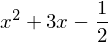

In [22]:
str_expr = "x**2 + 3*x - 1/2"
expr = sympify(str_expr)
display(expr)
display(expr.subs(x, 2))

## evalf()
数を float にするときに使う。

In [23]:
expr = sqrt(8)
display(expr.evalf())

`evalf()` は何桁までも指定できる。

In [25]:
expr = sqrt(2)
display(expr.evalf(100))

シンボルからなる式をある点で評価する時は次のように評価するのが効率的だし安定的な評価になる。

In [ ]:
expr = cos(2*x)
display(expr.evalf(subs={x: 2.4}))

評価の時に丸め誤差が一定より小さい時、オプションで切り落とすこともできる。

In [26]:
one = cos(1)**2 + sin(1)**2
display((one - 1).evalf())
display((one - 1).evalf(chop=True))

## lambdify()
複数の点での評価がほしい時の効率的な評価法を考えたい。
例えば 1000 個の点で評価したい時 Sympy ではものすごい遅い時がある。
特に任意精度の評価がほしいわけでもない場合は Numpy や Scipy を使う方がいい。

Sympy の式を数値評価可能な式に変換するのに楽には `lamdify()` を使うことだ。

In [27]:
import numpy 
a = numpy.arange(10) 
expr = sin(x)
f = lambdify(x, expr, "numpy") 
display(f(a))

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

Numpy の魔力で `f(a)` で一気に関数値の配列が作れるのがとても素敵。
Numpy 以外に Python 標準の `math` モジュールも使える。
他にも自分で作ったモジュールを使うこともできる：これについては公式のチュートリアル参照。

- [公式のチュートリアル](http://docs.sympy.org/latest/tutorial/basic_operations.html): ここの一番下。

In [28]:
import numpy 
a = numpy.arange(10) 
expr = sin(x)
f = lambdify(x, expr, "math")
display(f(0.1))

# 出力
いわゆる pretty print に関わる話。
SymPy オブジェクトを C, Fortran, Javascript, Theano, Python コードに変換することもできるけれども、ここでは触れない。

## 出力設定
その時々で最適な出力設定をしたければ `init_printing()` を使おう。
環境ごとに適切な設定を選んでくれる。

In [2]:
from sympy import init_printing
init_printing() 

## init_session()
`init_session()` もかなり使える。
必要なインポート、便利なシンボル定義、プロットに関するセットアップまでやってくれる。
物理で使う想定の場合, k, m はばね定数、質量という実数を割り当てたいシンボルに整数指定が入ってしまうのでちょっと微妙かもしれない。

In [6]:
from sympy import init_session
init_session() 

IPython console for SymPy 1.0 (Python 3.5.1-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


## init_printing() でどうなるか

- LaTeX がインストールされている状態での IPython QTConsole では LaTeX でコンパイルされた表記になる。
- LaTeX がインストールされていなくて matplotlib  がインストールされているなら matplotlib のレンダリングエンジンが動く。
- matplotlib がインストールされていないなら unicode の pretty printer 表記になる。
- Jupyter 上では LaTeX+MathJax が使われる。
- ターミナルが unicode をサポートしている状態でのコンソールでは unicode での pretty print になる。
- ターミナルが unicode をサポートしていないなら ascii での pretty print になる。

基本的には LaTeX コンパイルされているのが一番読みやすい。
LaTeX をインストールしていなくても Jupyter なら MathJax の恩恵が受けられて便利。

どうしても LaTeX を使いたくないなら `use_latex=False` にしよう。
`use_unicode = False` オプションもある。

## 出力関数
いろいろ紹介。

### str()
式の string 形式が欲しいなら `str(expr)` を使えばいい。
これは `print(expr)` でも同じ結果が出せる。
String 形式は読みやすさだけでなく Python の正しい構文としてコピー・ペーストできるように配慮された形式だ。

In [9]:
from sympy import *
x, y, z = symbols('x y z')
display(str(Integral(sqrt(1/x), x)))
print(Integral(sqrt(1/x), x))

'Integral(sqrt(1/x), x)'

Integral(sqrt(1/x), x)


### srepr()
式の `srepr` 形式は式の厳密な形を表している：理解のためには出力を実際に見てみた方が早い。
詳しくは[ここ](http://docs.sympy.org/latest/tutorial/manipulation.html#tutorial-manipulation)参照。
内部的な式の作り方を見たいなら参考になる形式。

In [10]:
srepr(Integral(sqrt(1/x), x))

"Integral(Pow(Pow(Symbol('x'), Integer(-1)), Rational(1, 2)), Tuple(Symbol('x')))"

### pprint(): ASCII Pretty Printer
ASCII pretty printer は `pprint()` 。
よほどの何かのこだわりがない限り、見にくいだけだから使う必要はない。

In [11]:
pprint(Integral(sqrt(1/x), x), use_unicode=False)

  /          
 |           
 |     ___   
 |    / 1    
 |   /  -  dx
 | \/   x    
 |           
/            


文字列形式で欲しいなら `pretty()` を使おう。ここで積極的に使いたい場面は特にない。

In [15]:
pretty(Integral(sqrt(1/x), x), use_unicode=False)

'  /          \n |           \n |     ___   \n |    / 1    \n |   /  -  dx\n | \\/   x    \n |           \n/            '

In [14]:
print(pretty(Integral(sqrt(1/x), x), use_unicode=False))

  /          
 |           
 |     ___   
 |    / 1    
 |   /  -  dx
 | \/   x    
 |           
/            


### pprint(), pretty(): Unicode Pretty Printer
Unicode pretty printer にも `pprint()` と `pretty()` を使う。

In [16]:
pprint(Integral(sqrt(1/x), x), use_unicode=True)

⌠           
⎮     ___   
⎮    ╱ 1    
⎮   ╱  ─  dx
⎮ ╲╱   x    
⌡           


### latex(): LaTeX
`latex()` を使えばいい。
Sympy は使えるが LaTeX が使えないというケースでは表記の参考になることもあるだろう。
オプションがたくさんあるので必要なら[ドキュメント](http://docs.sympy.org/latest/modules/printing.html#sympy.printing.latex.latex)を見よう。

In [17]:
print(latex(Integral(sqrt(1/x), x)))

\int \sqrt{\frac{1}{x}}\, dx


### print_mathml(): MathML
`print_mathml()` を使う。
`sympy.printing.mathml` からインポートすることに注意する。
対応する文字列が欲しいなら `mathml()` を使おう。

In [18]:
from sympy.printing.mathml import print_mathml
print_mathml(Integral(sqrt(1/x), x))

<apply>
	<int/>
	<bvar>
		<ci>x</ci>
	</bvar>
	<apply>
		<root/>
		<apply>
			<power/>
			<ci>x</ci>
			<cn>-1</cn>
		</apply>
	</apply>
</apply>



### dotprint(): dot
`dotprint()` は `sympy.printing.dot prints` をインポートすることで使えるようになる。
dot 自体はグラフ構造を記述する言語で Graphviz で画像にレンダリングする。
詳しくは[ここ](http://docs.sympy.org/latest/tutorial/manipulation.html#tutorial-manipulation)を見よう。
Graphviz は[ここ](http://www.graphviz.org/)。

In [19]:
from sympy.printing.dot import dotprint
from sympy.abc import x
print(dotprint(x+2)) 

digraph{

# Graph style
"ordering"="out"
"rankdir"="TD"

#########
# Nodes #
#########

"Add(Integer(2), Symbol(x))_()" ["color"="black", "label"="Add", "shape"="ellipse"];
"Integer(2)_(0,)" ["color"="black", "label"="2", "shape"="ellipse"];
"Symbol(x)_(1,)" ["color"="black", "label"="x", "shape"="ellipse"];

#########
# Edges #
#########

"Add(Integer(2), Symbol(x))_()" -> "Integer(2)_(0,)";
"Add(Integer(2), Symbol(x))_()" -> "Symbol(x)_(1,)";
}
